In [323]:
D = 1
alpha = 1
delta_t = 0.1

Моделирование выполняется с помощью цифрового КИХ-фильтра, на вход которого подается белый шум. Коэффициенты фильтра вычисляются по формуле:
$$c_k = \frac{\sqrt{2D\gamma}}{\sqrt[4]{\pi\alpha}} \cdot e^{-2\gamma^2k^2} ,$$

где $\gamma = \alpha\Delta t < \frac{1}{2}$ 

эта формула соответствует корелляционной функции процесса вида:
$$ R_{xy}(\tau) = De^{-\alpha t^2} $$



In [324]:
import numpy as np

gamma = alpha * delta_t

k = np.arange(20);
c = np.sqrt(2 * D * gamma) / np.power(np.pi, 0.25) * np.exp(-2 * gamma**2 * k**2)
    

Моделирование реализации случайного процесса (фильтрация) выполняется по формуле:
$$ x(t) = \sum_{k=0}^p c_k x_{n-k} $$

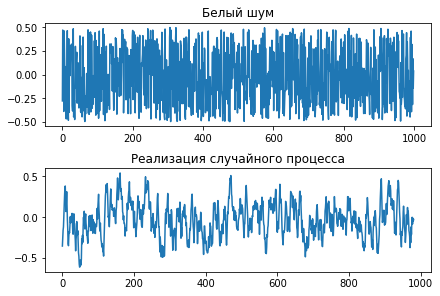

In [325]:
%matplotlib inline
import matplotlib.pyplot as plt

num_samples = 1000

samples = numpy.random.random(size=num_samples) - 0.5
filtered = np.convolve(samples, c, mode='valid')


fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(samples)
axs[0].set_title('Белый шум')

axs[1].plot(filtered)
axs[1].set_title('Реализация случайного процесса')

plt.show()


In [326]:
np.mean(filtered) # Математическое ожидание реализации сл процесса

-0.03163865090501885

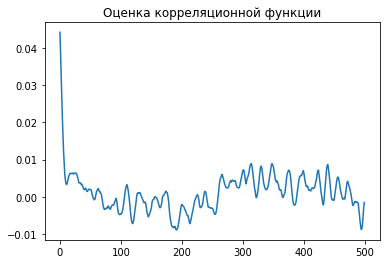

In [327]:
r = np.zeros(500)

N = num_samples - k.size * 2;

for m in range(0, 500):
    r[m] = 0
    for n in range(0, N - m - 2):
        r[m] = r[m] + 1. / (N - m) * filtered[n] * filtered[n + m]

plt.plot(r)
plt.title('Оценка корреляционной функции')
plt.show()
